In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from scipy.interpolate import interp1d

def plot_roc_curves_from_files(csv_files, labels, output_file):
    """
    Plots ROC curves from multiple CSV files with automatic interpolation.

    Parameters:
    csv_files (list of str): List of CSV file paths.
    labels (list of str): List of labels for each ROC curve.
    output_file (str): Output filename for the plot.
    """
    if not csv_files or not labels or len(csv_files) != len(labels):
        print("Invalid input: Ensure that csv_files and labels are non-empty and of the same length.")
        return
    
    plt.figure(figsize=(8, 6))  # Initialize a figure for the plot

    # Different line styles and markers for variety
    line_styles = ["-", "--", "-.", ":"]
    markers = ["o", "s", "^", "d", "*"]
    style_count = 0

    for csv_file, label in zip(csv_files, labels):
        # Read CSV file into a DataFrame
        roc_data = pd.read_csv(csv_file)

        # Extract data from DataFrame
        fpr = roc_data["fpr"].values
        tpr = roc_data["tpr"].values

        # Automatic interpolation
        interp_func = interp1d(fpr, tpr, kind='linear')
        fpr_interpolated = np.linspace(0, 1, 100)
        tpr_interpolated = interp_func(fpr_interpolated)

        # Calculate AUC for interpolated curve
        roc_auc = auc(fpr_interpolated, tpr_interpolated)

        # Plot ROC curve with interpolated values and different line styles and markers
        line_style = line_styles[style_count % len(line_styles)]
        marker = markers[style_count % len(markers)]
        plt.plot(
            fpr_interpolated,
            tpr_interpolated,
            linestyle=line_style,
            marker=marker,
            markevery=5,
            markersize=7,
            lw=2,
            label=f"{label} (AUC = {roc_auc:.2f})"
        )

        style_count += 1

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], color="grey", lw=2, linestyle="--")

    # Customize the plot
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.minorticks_on()
    plt.tick_params(axis="both", which="both", direction="in", top=True, right=True)
    plt.grid(True, which="minor", color="gray", linestyle=":", linewidth=0.5)

    # Save the plot
    plt.savefig(output_file, format='pdf')

    # Show the plot
    plt.show()
    plt.close()

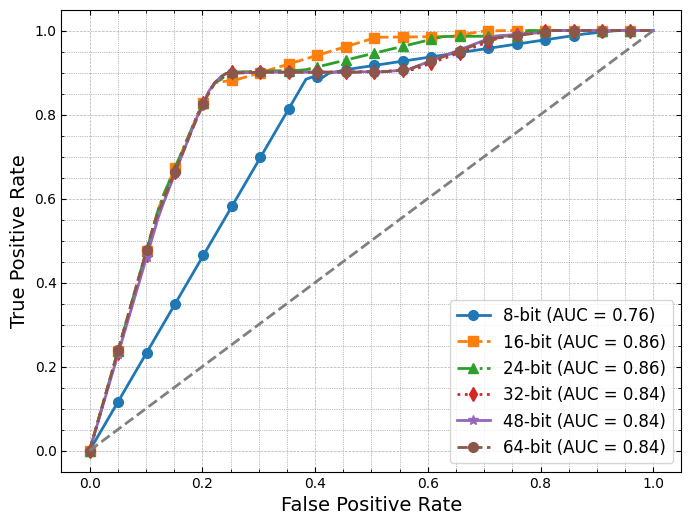

In [12]:
csv_files = ['../../reports/CSV/ROC/roc_curve_data_8.csv', '../../reports/CSV/ROC/roc_curve_data_16.csv', '../../reports/CSV/ROC/roc_curve_data_24.csv', '../../reports/CSV/ROC/roc_curve_data_32.csv', '../../reports/CSV/ROC/roc_curve_data_48.csv', '../../reports/CSV/ROC/roc_curve_data_64.csv']
labels = ['8-bit', '16-bit', '24-bit', '32-bit', '48-bit', '64-bit']
output_file = '../../reports/figures/ROC/ROC-comparison.pdf'
plot_roc_curves_from_files(csv_files, labels, output_file)